In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression # Not allowed to be used for homeworks!
from sklearn.metrics import mean_squared_error    # -"-
from sklearn.preprocessing import PolynomialFeatures # -"-

<u>**Example:**</u> We sample test and training data from a function $f(x)$ and add Gaussian noise $\epsilon \sim \mathcal{N}(\mu=0,\sigma^2=0.04)$ to the samples. Then, we aim to fit polynomials to the obtained data. The true underlying function is
\begin{equation}
f(x) = sin(x \cdot cos x)
\end{equation}
and we sample from $f(x) + \epsilon$ for $x \in [0,2\pi]$.

In [3]:
# Define the function f(x)
def f(x):
    y = np.sin(x*np.cos(x))
    return y

Text(0.5, 1.0, 'Test data')

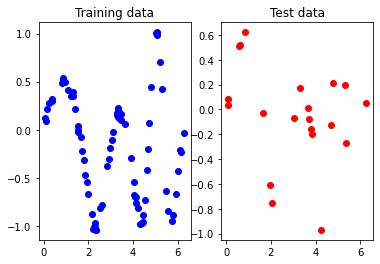

In [4]:
# First create the training data (80 samples)
xx_training = np.random.uniform(0,2*np.pi,80)
xx_training.sort() # Sort from smallest to largest
targets_training = f(xx_training) + np.random.normal(0,0.04,80)

# Then create the test data (20 samples)
xx_test = np.random.uniform(0,2*np.pi,20)
xx_test.sort()
targets_test = f(xx_test) + np.random.normal(0,0.04,20)

# Plot the data
fig, axs = plt.subplots(1, 2)
axs[0].scatter(xx_training, targets_training, c='b')
axs[0].set_title('Training data')
axs[1].scatter(xx_test, targets_test, c='r')
axs[1].set_title('Test data')

We now fit a linear function $y(x;w) = w_0 + w_1 \cdot x$ to the training data and evaluate the root mean squared error (RMSE) for both data sets.

(-1.1, 1.1)

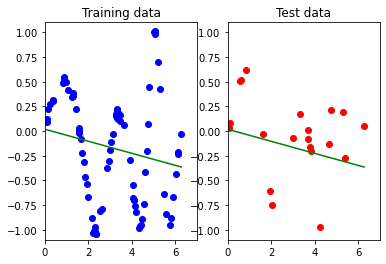

In [5]:
# Create a linear model object and fit it to the training data
model1 = LinearRegression()
model1.fit(np.reshape(xx_training,(-1,1)), np.reshape(targets_training,(-1,1))) # Need to reshape (80,) lists to (80,1) arrays

# Make predictions for model 1 for both training and test data
y_predict_training = model1.predict(np.reshape(xx_training,(-1,1)))
y_predict_test = model1.predict(np.reshape(xx_test,(-1,1)))

# Plot the results
fig, axs = plt.subplots(1, 2)
axs[0].scatter(xx_training, targets_training, c='b')
axs[0].set_title('Training data')
axs[0].plot(xx_training,y_predict_training,c='g')
axs[0].set_xlim([0,7])
axs[0].set_ylim([-1.1,1.1])
axs[1].scatter(xx_test, targets_test, c='r')
axs[1].set_title('Test data')
axs[1].plot(xx_test,y_predict_test,c='g')
axs[1].set_xlim([0,7])
axs[1].set_ylim([-1.1,1.1])

In [6]:
# Compute RMSEs
MSE_training = mean_squared_error(y_predict_training, targets_training) # Mean squared training error
MSE_test = mean_squared_error(y_predict_test, targets_test) # Mean squared training error

RMSE_training = np.sqrt(MSE_training) # Take square root for a better comparison between different sample sizes
RMSE_test = np.sqrt(MSE_test)
print("RMSE training data:",RMSE_training)
print("RMSE test data:",RMSE_test)

RMSE training data: 0.5525614166506684
RMSE test data: 0.3928622903267444


As the linear model does not fit the data well, we aim to fit higher degree polynomial model functions $y(x;w) = w_0 + \sum\limits_{d = 1}^{D} w_d x^d$.

In [26]:
# Choose degree of the polynomial and create the design matrices
degree = 11
design_matrix_training = PolynomialFeatures(degree, include_bias=True).fit_transform(np.reshape(xx_training,(-1,1)))
design_matrix_test = PolynomialFeatures(degree, include_bias=True).fit_transform(np.reshape(xx_test,(-1,1)))

print(np.shape(design_matrix_training))
#print(design_matrix_training)
print(np.shape(design_matrix_test))
#print(design_matrix_test)

(80, 12)
(20, 12)


(-1.1, 1.1)

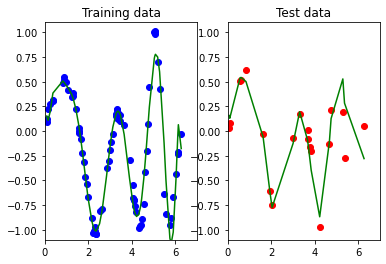

In [27]:
# Fit a polynomial model with the specified degree to the training data and make predictions
model2 = LinearRegression()
model2.fit(design_matrix_training, np.reshape(targets_training,(-1,1)))

y_predict_training = model2.predict(design_matrix_training)
y_predict_test = model2.predict(design_matrix_test)

# Plot the results
fig, axs = plt.subplots(1, 2)
axs[0].scatter(xx_training, targets_training, c='b')
axs[0].set_title('Training data')
axs[0].plot(xx_training,y_predict_training,c='g')
axs[0].set_xlim([0,7])
axs[0].set_ylim([-1.1,1.1])
axs[1].scatter(xx_test, targets_test, c='r')
axs[1].set_title('Test data')
axs[1].plot(xx_test,y_predict_test,c='g')
axs[1].set_xlim([0,7])
axs[1].set_ylim([-1.1,1.1])

In [25]:
# Compute RMSEs
MSE_training = mean_squared_error(y_predict_training, targets_training) # Mean squared training error
MSE_test = mean_squared_error(y_predict_test, targets_test) # Mean squared training error

RMSE_training = np.sqrt(MSE_training) # Take square root for a better comparison between different sample sizes
RMSE_test = np.sqrt(MSE_test)
print("RMSE training data:",RMSE_training)
print("RMSE test data:",RMSE_test)

RMSE training data: 0.46196502410750073
RMSE test data: 0.5300679441620325
